In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a dataframe from csv
df = pd.read_csv('fuel_ferc1.csv')

In [3]:
df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


#### The utility_id_ferc1 and report_year are categorical variable but represented as integers. Therefore should be converted to a categorical data type

In [5]:
# Convert numerical data type to categorical data type
df['utility_id_ferc1'] = df['utility_id_ferc1'].astype('object')
df['report_year'] = df['report_year'].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  object 
 2   report_year                   29523 non-null  object 
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.5+ MB


In [6]:
df.shape

(29523, 11)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fuel_qty_burned,29523.0,2.622119e+06,9.118004e+06,1.000000,13817.0000,253322.000000,1424034.000,5.558942e+08
fuel_mmbtu_per_unit,29523.0,8.492111e+00,1.060022e+01,0.000001,1.0240,5.762694,17.006,3.412600e+02
fuel_cost_per_unit_burned,29523.0,2.086490e+02,2.854490e+03,-276.080000,5.2070,26.000000,47.113,1.393580e+05
fuel_cost_per_unit_delivered,29523.0,9.175704e+02,6.877593e+04,-874.937000,3.7785,17.371000,42.137,7.964521e+06
fuel_cost_per_mmbtu,29523.0,1.930435e+01,2.091541e+03,-41.501000,1.9400,4.127000,7.745,3.592780e+05


In [8]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

# Answer Test Questions

In [9]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [10]:
A.append(B)

In [11]:
A

[1, 2, 3, 4, 5, 6, [13, 21, 34]]

In [12]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [13]:
A.extend(B)

In [14]:
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [15]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
df.groupby('fuel_type_code_pudl')[['fuel_cost_per_unit_burned']].mean().min()

fuel_cost_per_unit_burned    13.659397
dtype: float64

In [17]:
df[['fuel_mmbtu_per_unit']].describe()

,fuel_mmbtu_per_unit
count,29523.000000
mean,8.492111
std,10.600220
min,0.000001
25%,1.024000
50%,5.762694
75%,17.006000
max,341.260000


In [18]:
# the skewness and kurtosis

fuel_qty_burned_skew = df['fuel_qty_burned'].skew(axis = 0, skipna = True)
fuel_qty_burned_kurt = df['fuel_qty_burned'].kurt(axis = 0, skipna = True)

In [19]:
print('fuel_qty_burned_skew: ', round(fuel_qty_burned_skew,2))
print('fuel_qty_burned_kurt: ', round(fuel_qty_burned_kurt,2))

fuel_qty_burned_skew:  15.85
fuel_qty_burned_kurt:  651.37


In [20]:
df.groupby('report_year')[['fuel_cost_per_unit_delivered']].mean()

,fuel_cost_per_unit_delivered
report_year,
1994,63.636060
1995,32.735269
1996,9196.705948
1997,11140.197239
1998,287.154420
1999,25.551627
2000,985.362877
2001,60.050396
2002,47.594361


In [21]:
df_coal = df.groupby(['report_year','fuel_type_code_pudl'])[['fuel_cost_per_unit_burned']].sum()

In [22]:
df_coal.loc[1994]

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,14984.572
gas,10792.496
nuclear,227983.354
oil,9362.194
other,116.737
waste,52.762


In [23]:
df_coal.loc[1998]

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,11902.597
gas,7475.596
nuclear,117788.269
oil,2608.657
other,225.428
waste,238.109


In [24]:
df.corr()['fuel_cost_per_unit_burned']

fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_unit_burned       1.000000
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
Name: fuel_cost_per_unit_burned, dtype: float64

## Visualizing correlation

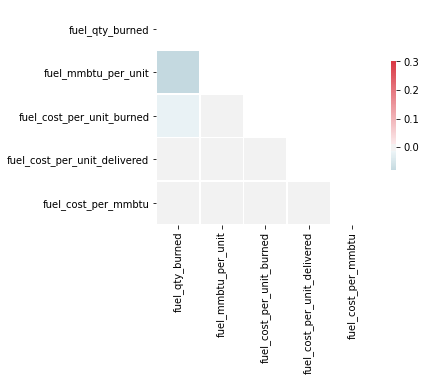

In [25]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})